In [98]:
# <h4 style = color:yellow>Steps for starting Machine Learning</h4> 

<h4 style = color:yellow>Steps for starting Machine Learning</h4> 

<img src="MachineLearning_Steps.png">

<h4 style = color:green>Step 1) completed downloaded file of data</h4> 

<h4 style = color:violet>Step2) Find our Problem Statement why we are creating them</h4> 
            <h2>Problem Statement</h2>

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.

<h1 style = color:yellow>Step 3) We are creating model</h4> 

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
plt.style.use('./deeplearning.mplstyle')
%matplotlib inline

In [100]:
# load the dataset
x_train, y_train = load_data()
print(x_train)
print(y_train)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

#### View the variables
Before starting on any task, it is useful to get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the variable `x_train` and the type of the variable.

In [101]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:10]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598 8.3829 7.4764 8.5781 6.4862 5.0546]


In [102]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:10])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233 11.886   4.3483 12.      6.5987
  3.8166]


In [103]:
# Checking dimension of our data

print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


<h1 style = color:yellow>Visualize our data using mataplot</h4> 

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


<h4 style = color:orange>Scattering all the x and y datapoints on graph.</h4> 

Text(0.5, 0, 'Population of City in 10,000s')

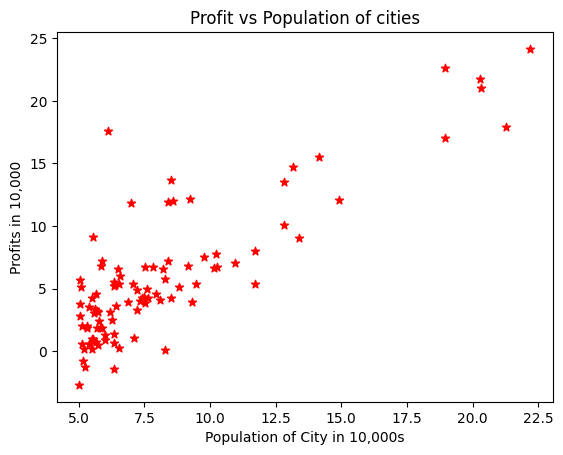

In [104]:

plt.style.use("default")
# u can also create customize style for plotting

# scatter the data
plt.scatter(x_train, y_train, marker='*', c='red') 


# Set title
plt.title("Profit vs Population of cities")

# Set the y-axis label
plt.ylabel("Profits in 10,000")

# Set the x-axis label
plt.xlabel('Population of City in 10,000s')


# plt.plot(x_train, y_train, c='b',label='Our Prediction')        
# # plot x and y using default line style and color
# This connects every point of scatter that use of plot


So as a ceo we wanted to find how profits from new city is depenedent on populations. We will create a model which will predict the profit for given population.
<h3 style = color:yellow>Take a time think which model or learning technique will solve your problem. </h3> 
<div class="alert alert-info">

<h4 style = color:orange><i> As it's data with output i.e. labelled so think for supervised method and from graph we know it's continous values graph not binary either 1 or zero so it's should be Linear model and we have only one feature i.e population.</h4> 
</div>


##  - Refresh your knowledge on linear regression

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

## 5 - Refreshing knowledge on  Cost function

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit i.e yhat, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset check value of x.ndim or size of x or y


#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

### Creating cost function for finding lowest w and b which help in accurate predictions 

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator
  Sor create a function which gives w and b as lowest at o/p


In [105]:
from xml.sax.handler import feature_external_ges


def compute_cost(x,y,w,b):
    # yhat = []
    su = 0
    for i in range(len(x)):
        yhat = (w*x[i]+b)
        cost = (y[i]-yhat)**2
        su += cost
        # print("COst is ", cost,end =" ")
    J = su/(2*len(x))
    return J

    # print("\n J is :, J)
    # print("\n sum is ,",su)
    # print(yhat,end=" ")

# print(compute_cost(x_train,y_train,2,1))


## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 
As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

#### Simply create program that gives  $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$

In [106]:
def compute_gradient(x, y, w, b):
    sum_dj_dw = 0
    sum_dj_db = 0
    for i in range(len(x)):
        yhat = (w*x[i]+b)
       

        a = (yhat-y[i])
        
        sum_dj_db += a 


        derivateofw = a*x[i]
        sum_dj_dw += derivateofw


        dj_dw = (1/(len(x)))*sum_dj_dw

        dj_db = (1/(len(x)))*sum_dj_db
    return (dj_dw, dj_db)
        # print("COst is ", cost,end =" ")
     
# compute_gradient(x_train,y_train,0.2,0.2)

Now we will use gradient_descent batch method
## 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [107]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [108]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


w,b will be less when we find minimum Cost at 4.49

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [109]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b
# now plot the predicted line vs scatter points

Text(0.5, 0, 'Population of City in 10,000s')

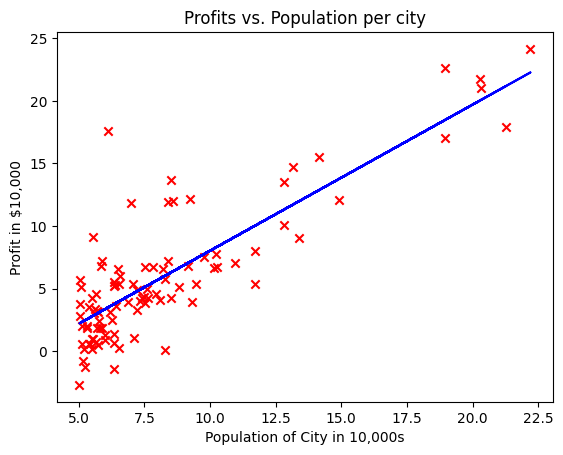

In [112]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [113]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
